![logos.png](attachment:logos.png)
# Escuela de Ciencias Informáticas - 2022 - DC - FCEN - UBA
## Curso: Procesamiento de Imágenes Satelitales.  Docente: Rafael Grimson


---
#  Notebook 2:  Imágenes expresadas como arrays 
---
Lo que veremos en esta notebook:

- [x] Imágenes monocromáticas (no satelitales) expresadas como array
- [x] Representación de una imagen en niveles de gris
- [x] Resolución de una imagen
- [x] Imágenes color RGB: Su representación matricial
---

### Objetivos de la notebook:

- En esta notebook esperamos que aprendas lo básico sobre imágenes en tonos de grises y en RGB.

### Datos con los que trabajaremos en esta Notebook:

- Dos archivos de jpg de Homero Simpson.

# 0. Correr esta notebook en el labo 1111 del $0 + \infty$.

Para correr esta notebook y las otras del curso en el labo tenés que seguir los siguientes pasos:
1. Abrí una termina con `ctrl`+`alt`+`T`
2. Entrá en el entorno donde están cargadas las bibliotecas del curso corriendo `source activate Curso_PDIS`.
3. Andá al directorio donde tenés el material del curso y ejecutá `jupyter-notebook`.

# 1. Imágenes expresadas como array

Un ráster consiste en un conjunto de datos ordenados en forma de matriz (filas x columnas), donde cada valor representa algún tipo de información. Vamos a crear y visualizar una matriz cualquiera:

In [1]:
import numpy as np


array = np.arange(256).reshape(16,16)
print(array)

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
 [144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191]
 [192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207]
 [208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223]
 [224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 

Ahora, veamos la misma matriz como imagen, haciendo uso de las funciones [_imshow_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) y [_text_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) de _matplotlib.pyplot_:

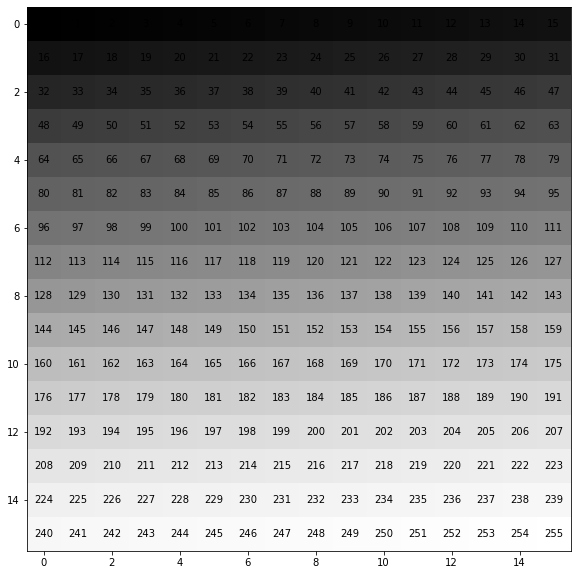

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(array, cmap='Greys_r')
for (i, j), z in np.ndenumerate(array):
      plt.text(j, i, z, ha='center', va='center')
plt.show()

En el ejemplo anterior utilizamos la paleta _Greys_r_; sin embargo, esta función, aplica por defecto una paleta de colores llamada _viridis_. En el siguiente [enlace](https://matplotlib.org/stable/tutorials/colors/colormaps.html) podrás consultar más acerca de las opciones disponibles.

Al ser la imagen una matriz de datos, podemos tratarla como tal y realizar las mismas operaciones que con un array cualquiera. Vamos a cargar el archivo _homero.jpg_ que se encuentra en la carpeta _data/raw_data/_ y veamos sus características:

In [9]:
image = plt.imread("data/raw_data/homero.jpg")

print('\nTipo de objeto:', type(image))
print('\nDimensiones:', image.shape)
print('\nTipo de dato:', image.dtype)
print('\nRango de datos:', np.min(image), '-',  np.max(image))
print('\nMatriz de datos: \n', image)



Tipo de objeto: <class 'numpy.ndarray'>

Dimensiones: (350, 279)

Tipo de dato: uint8

Rango de datos: 0 - 255

Matriz de datos: 
 [[167 167 167 ... 167 167 167]
 [167 167 167 ... 167 167 167]
 [167 167 167 ... 167 167 167]
 ...
 [252 253 254 ... 167 167 167]
 [252 252 253 ... 167 167 167]
 [244 245 245 ... 167 167 167]]


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

## 1.1 Representación en niveles de gris de una imagen.

Indica la capacidad de discriminar variaciones en los tonos de una imagen. Viene expresado en el número de bits que se necesitan para almacenar un píxel, así una imagen de 8 bits tiene 2^8 = 256 niveles de grises que puede discriminar

![bins.png](attachment:bins.png)

Vamos a binarizar nuestra imagen para verlo de manera gráfica:

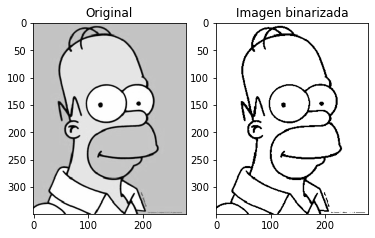

In [6]:
imageBN = image.copy()
imageBN[imageBN<128] = 0
imageBN[imageBN>=128] = 1

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(image, cmap='Greys_r')
ax[0].set_title('Original')
ax[1].imshow(imageBN, cmap='Greys_r')
ax[1].set_title('Imagen binarizada')
plt.show()

[[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0

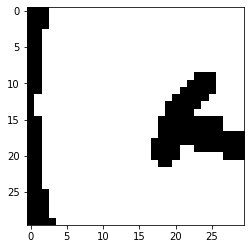

In [7]:
sel = imageBN[225:255, 100:130]
print(sel)
plt.imshow(sel, cmap='Greys_r')

(array([ 1601.,  1382.,   947.,   640.,   427.,   318.,   212.,   196.,
          169.,   179.,   169.,   140.,   121.,   125.,   120.,   116.,
          109.,    93.,    96.,   113.,    95.,   103.,    90.,   100.,
          108.,   113.,   130.,   110.,    98.,   112.,   128.,   109.,
          113.,   110.,   133.,   155.,   138.,   148.,   174.,   317.,
          785., 40128., 10593.,  2405.,   593.,   321.,   164.,   132.,
          124.,   205.,   585.,  2257., 15266.,  1111.,   541.,   237.,
          131.,    72.,    84.,   107.,   286.,   747.,  1602.,  9317.]),
 array([  0.      ,   3.984375,   7.96875 ,  11.953125,  15.9375  ,
         19.921875,  23.90625 ,  27.890625,  31.875   ,  35.859375,
         39.84375 ,  43.828125,  47.8125  ,  51.796875,  55.78125 ,
         59.765625,  63.75    ,  67.734375,  71.71875 ,  75.703125,
         79.6875  ,  83.671875,  87.65625 ,  91.640625,  95.625   ,
         99.609375, 103.59375 , 107.578125, 111.5625  , 115.546875,
        119.53

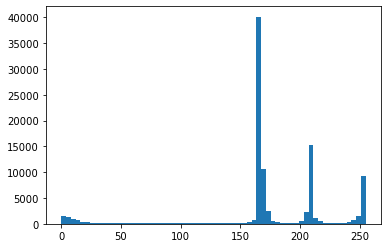

In [8]:
plt.hist(image.reshape(-1),bins=64)

### Ejercicio 1.1:

Realizá un gráfico que contenga dos subplots. A la izquierda deberá mostrar la imagen recién cargada y a la derecha el histograma de los datos.

Tip: Para generar el histograma, considerá redimensionar el array, ya que la función `plt.hist` trabaja con vectores en una dimensión. Esto podés hacerlo de varias maneras:

- Forma 1:

    ```
    filas, cols = array.shape
    
    array = array.reshape(filas * cols)
    ```

- Forma 2:
    
    ```
    array = array.reshape(-1)
    ```

- Forma 3:
    
    ```
    array = array.ravel()
    ```
    
- Forma 4:
    
    ```
    array = array.flatten()
    ```

## 1.2 Resolución

En una imagen, la resolución es el nivel de detalle que tiene la imagen y está relacionada con la capacidad de discriminar diferentes elementos. A mayor resolución, mayor poder de discriminación.


In [11]:
from PIL import Image
import PIL

image = Image.open("data/raw_data/homero.jpg")
factor = 10
image2 = image.resize((image.size[0]//factor, image.size[1]//factor), resample=PIL.Image.BILINEAR)

imageArr = np.array(image)
image2Arr = np.array(image2)

print('Las dimensiones de la imagen original son:')
print(imageArr.shape)
print(f'\nLas dimensiones de la imagen remuestreada con un factor de {factor} son:')
print(image2Arr.shape)

Las dimensiones de la imagen original son:
(350, 279)

Las dimensiones de la imagen remuestreada con un factor de 10 son:
(35, 27)


Para conocer más acerca de la librería PIL y sus métodos de remuestreo consulte el siguiente [enlace](https://pillow.readthedocs.io/en/stable/reference/Image.html)

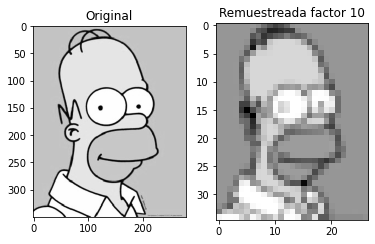

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(imageArr, cmap='Greys_r')
ax[0].set_title('Original')
ax[1].imshow(image2Arr, cmap='Greys_r')
ax[1].set_title(f'Remuestreada factor {factor}')
plt.show()

## 1.3 Imágenes RBG. Matrices de tres dimensiones

![image.png](attachment:image.png)
Modelo aditivo de colores rojo, verde, azul.

![image.png](attachment:image.png)
Ejemplo de una imagen y sus tres componentes R, G y B.

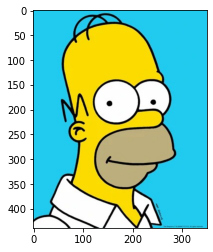

In [13]:
image_col = plt.imread("data/raw_data/homero_color.jpg")
plt.imshow(image_col)

In [14]:
print('\nTipo de objeto:', type(image_col))
print('\nDimensiones:', image_col.shape)
print('\nTipo de dato:', image_col.dtype)
print('\nRango de datos:', f'{np.min(image_col)} - {np.max(image_col)}')
print('\nMatriz de datos: \n', image_col)


Tipo de objeto: <class 'numpy.ndarray'>

Dimensiones: (439, 350, 3)

Tipo de dato: uint8

Rango de datos: 0 - 255

Matriz de datos: 
 [[[ 34 202 239]
  [ 34 202 239]
  [ 34 202 239]
  ...
  [ 33 203 239]
  [ 33 203 239]
  [ 33 203 239]]

 [[ 34 202 239]
  [ 34 202 239]
  [ 34 202 239]
  ...
  [ 33 203 239]
  [ 33 203 239]
  [ 33 203 239]]

 [[ 34 202 239]
  [ 34 202 239]
  [ 34 202 239]
  ...
  [ 33 203 239]
  [ 33 203 239]
  [ 33 203 239]]

 ...

 [[250 254 255]
  [250 254 255]
  [250 254 255]
  ...
  [ 31 205 242]
  [ 31 205 242]
  [ 31 205 242]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [ 31 205 242]
  [ 31 205 242]
  [ 31 205 242]]

 [[242 251 250]
  [242 251 250]
  [243 249 249]
  ...
  [ 30 204 241]
  [ 31 205 242]
  [ 32 204 242]]]


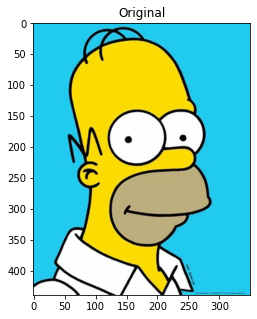

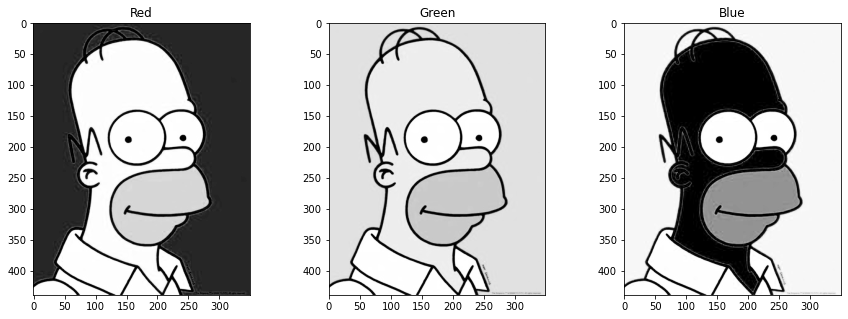

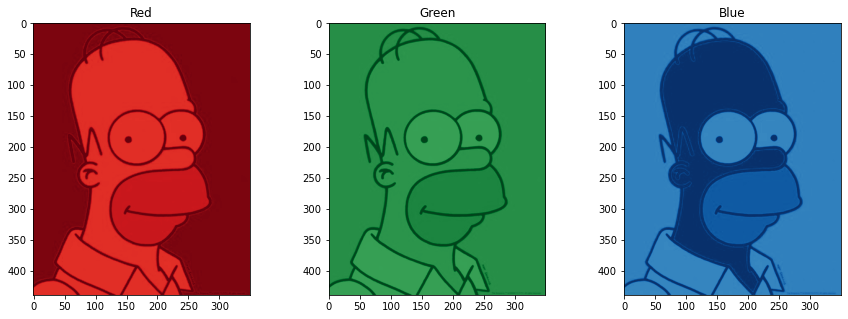

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.imshow(image_col)
ax.set_title('Original')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].imshow(image_col[:,:,0], cmap='Greys_r')
ax[0].set_title(f'Red')
ax[1].imshow(image_col[:,:,1], cmap='Greys_r')
ax[1].set_title(f'Green')
ax[2].imshow(image_col[:,:,2], cmap='Greys_r')
ax[2].set_title(f'Blue')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].imshow(image_col[:,:,0], cmap='Reds_r',vmin=0,vmax=768)
ax[0].set_title(f'Red')
ax[1].imshow(image_col[:,:,1], cmap='Greens_r',vmin=0,vmax=768)
ax[1].set_title(f'Green')
ax[2].imshow(image_col[:,:,2], cmap='Blues_r',vmin=0,vmax=768)
ax[2].set_title(f'Blue')
plt.show()


### Ejercicio 1.2:

Ploteá en pantalla la cara de Homero a color pero intercambiando los datos de los colores rojo y azul. Utilizá el gráfico del inicio de la sección (adición de luces RGB) para interpretar el resultado. 

Tip: Tené cuidado que el comando 

```
image_falso_color = image_col
```
    
no crea una copia del array `image_col` sino simplemente una nueva forma de llamar al mismo objeto y esto te puede causar problemas al pisar la memoria. Para generar un nuevo array de las mismas dimensiones que el ya existente podés usar:

```
image_falso_color = np.empty_like(image_col)
```

(o, como hicimos con la binarización de la imagen en escala de grises `image_falso_color = image_col.copy()`)
y luego cargar en cada slice los datos correspondientes.

---

In [26]:
banda_r = image_col[:,:,0]
banda_g = image_col[:,:,1]
banda_b = image_col[:,:,2]

In [27]:
imagen_ejercicio = np.empty_like(image_col)
image_col[:,:,0] = banda_b
image_col[:,:,1] = banda_g
image_col[:,:,2] = banda_r
plt.show()



ValueError: assignment destination is read-only

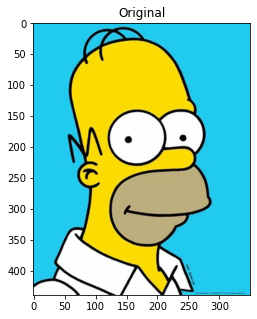

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.imshow(image_col)
ax.set_title('Original')
plt.show()

ax[0].imshow(image_col[:,:,0], cmap='Greys_r')
ax[0].set_title(f'Red')

In [19]:

print('\nRango de datos:', f'{np.min(image_col)} - {np.max(image_col)}')
print('\nMatriz de datos: \n', image_col)


Rango de datos: 0 - 255

Matriz de datos: 
 [[[ 34 202 239]
  [ 34 202 239]
  [ 34 202 239]
  ...
  [ 33 203 239]
  [ 33 203 239]
  [ 33 203 239]]

 [[ 34 202 239]
  [ 34 202 239]
  [ 34 202 239]
  ...
  [ 33 203 239]
  [ 33 203 239]
  [ 33 203 239]]

 [[ 34 202 239]
  [ 34 202 239]
  [ 34 202 239]
  ...
  [ 33 203 239]
  [ 33 203 239]
  [ 33 203 239]]

 ...

 [[250 254 255]
  [250 254 255]
  [250 254 255]
  ...
  [ 31 205 242]
  [ 31 205 242]
  [ 31 205 242]]

 [[249 255 255]
  [249 255 255]
  [249 255 255]
  ...
  [ 31 205 242]
  [ 31 205 242]
  [ 31 205 242]]

 [[242 251 250]
  [242 251 250]
  [243 249 249]
  ...
  [ 30 204 241]
  [ 31 205 242]
  [ 32 204 242]]]


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
ax[0].imshow(image_col[:,:,0], cmap='Greys_r')
ax[0].set_title(f'Red')
ax[1].imshow(image_col[:,:,1], cmap='Greys_r')
ax[1].set_title(f'Green')
ax[2].imshow(image_col[:,:,2], cmap='Greys_r')
ax[2].set_title(f'Blue')
plt.show()